In [1]:
# Parameters

mirrorLength = 1 # Length of the mirror in SI units
distV = 2000 # Distance between the mirror and the light source/photomultiplier
             # in SI units
distH = 1 # Distance between the light source and the photomultiplier in
          # SI units
numPiece = 100000 # The number of pieces that the mirror is divided into
pieceLen = mirrorLength/numPiece # The length of each "piece" of the mirror
                                 # in SI units
speed = 3*(10**8) # The speed of light in SI units
start = 0 # The position of the leftmost end of the mirror in SI units

In [2]:
# The function that calculates the times for various paths that a photon
# may take to travel from the light source to the photomultiplier

def createTimes(numPiece, pieceLen, distV, distH, start, speed):
    timesList = []
    for i in range(numPiece+1):
        time = (math.sqrt(distV**2+(start+i*pieceLen)**2)+math.sqrt(
            distV**2+(distH-(start+i*pieceLen))**2))/speed
        timesList.append(time)
    return timesList

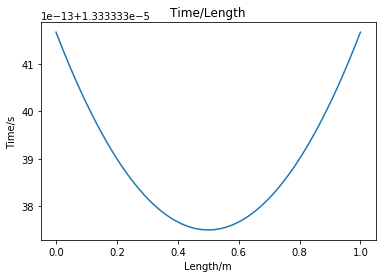

In [6]:
# Code that creates a plot

import math
import pylab
timesList = createTimes(numPiece, pieceLen, distV, distH, start, speed)
length = []
for i in range(numPiece+1):
    length.append(i*pieceLen)
pylab.figure("Time/Length")
pylab.title("Time/Length")
pylab.plot(length, timesList)
pylab.xlabel("Length/m")
pylab.ylabel("Time/s")
pylab.show()

In [4]:
# Code that finds the minimum time and calculates the corresponding angles
# of incidence and reflection

leastTime = None
for i in range(numPiece+1):
    if leastTime==None or timesList[i]<leastTime:
        leastTime = timesList[i]
        index = i
if index==0 or index==numPiece:
    print("Minimum time was not found.")
else:
    angleI = 90-((math.atan(distV/abs(start+index*pieceLen)))*(180/math.pi))
    angleR = 90-((math.atan(distV/abs(distH-(start+index*pieceLen))))
                 *(180/math.pi))
    print("angle_of_incidence =", round(angleI, 3), "degrees")
    print("")
    print("angle_of_reflection =", round(angleR, 3), "degrees")

angle_of_incidence = 0.014 degrees

angle_of_reflection = 0.014 degrees


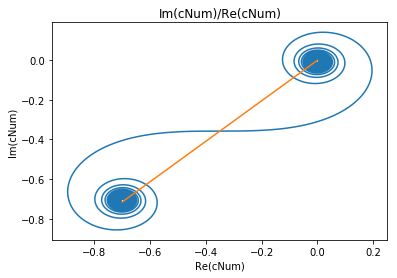

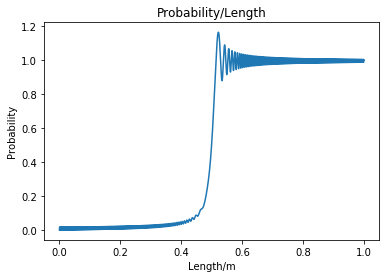

In [5]:
# Code that creates a plot of the resultant probability amplitude at the
# photomultiplier and shows that the greatest contribution to that amplitude
# is made by a small region of the mirror around the point that the angle
# of incidence equals the angle of reflection at

import cmath
listC = []
cNum = 0
for i in range(numPiece+1):
    listC.append(cmath.exp((2*cmath.pi*450*10**12)*timesList[i]*1j))
    cNum += cmath.exp((2*cmath.pi*450*10**12)*timesList[i]*1j)
listX = []
listY = []
listAbs = []
cNumNorm = 0
for i in range(numPiece+1):
    cNumNorm += listC[i]/abs(cNum)
    listX.append(cNumNorm.real)
    listY.append(cNumNorm.imag)
    listAbs.append(abs(cNumNorm))
pylab.figure("Im(cNum)/Re(cNum)")
pylab.title("Im(cNum)/Re(cNum)")
pylab.plot(listX, listY)
pylab.plot([listX[0], listX[numPiece]], [listY[0], listY[numPiece]])
pylab.xlabel("Re(cNum)")
pylab.ylabel("Im(cNum)")
pylab.show()
pylab.figure("Probability/Length")
pylab.title("Probability/Length")
pylab.plot(length, listAbs)
pylab.xlabel("Length/m")
pylab.ylabel("Probability")
pylab.show()